In [4]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [5]:
USER_PATH = "/Users/turtle/Desktop/IDA/_project_copy/LA-QOL/"

PATH_UNCLEAN = USER_PATH + "data/Assessor_Parcel_Data/_unclean/"
PATH_CLEAN = USER_PATH + "data/Assessor_Parcel_Data/_clean/"
file_name = "LA_res_selected_2021_clean.csv"

In [6]:
df = pd.read_csv(PATH_CLEAN + file_name)
df.info()

df["PropertyType"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694657 entries, 0 to 694656
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AIN                   694657 non-null  int64  
 1   RollYear              694657 non-null  int64  
 2   AssessorID            694657 non-null  object 
 3   PropertyType          694657 non-null  object 
 4   SpecificUseType       694652 non-null  object 
 5   totBuildingDataLines  694657 non-null  int64  
 6   YearBuilt             694657 non-null  int64  
 7   EffectiveYearBuilt    694657 non-null  int64  
 8   SQFTmain              694657 non-null  int64  
 9   Bedrooms              694657 non-null  int64  
 10  Bathrooms             694657 non-null  int64  
 11  Units                 694657 non-null  int64  
 12  TotalValue            694657 non-null  float64
 13  Cluster               694657 non-null  int64  
 14  ZIPcode5              694657 non-null  float64
 15  

SFR    462542
CND    124973
R-I    106559
OTH       304
VAC       279
Name: PropertyType, dtype: int64

In [8]:
# GROWTH RATE attributes
PATH_CLEAN = USER_PATH + "data/Assessor_Parcel_Data/_clean/"
PATH_2021 = PATH_CLEAN + "LA_res_selected_2021_clean.csv"
PATH_2020 = PATH_CLEAN + "LA_res_selected_2020_clean.csv"
PATH_2019 = PATH_CLEAN + "LA_res_selected_2019_clean.csv"
PATH_2018 = PATH_CLEAN + "LA_res_selected_2018_clean.csv"
PATH_2017 = PATH_CLEAN + "LA_res_selected_2017_clean.csv"

df_2021 = pd.read_csv(PATH_2021)      
df_2020 = pd.read_csv(PATH_2020)
df_2019 = pd.read_csv(PATH_2019)
df_2018 = pd.read_csv(PATH_2018)
df_2017 = pd.read_csv(PATH_2017)

# getting TotalValue of the parcel for last 5 years
df_0 = df_2021[["AIN", "TotalValue"]]
df_0 = df_0.rename(columns = {'TotalValue': '2021_TotalValue'})

df_1 = df_2020[["AIN", "TotalValue"]]
df_1 = df_1.rename(columns = {'TotalValue': '2020_TotalValue'})

df_2 = df_2019[["AIN", "TotalValue"]]
df_2 = df_2.rename(columns = {'TotalValue': '2019_TotalValue'})

df_3 = df_2018[["AIN", "TotalValue"]]
df_3 = df_3.rename(columns = {'TotalValue': '2018_TotalValue'})

df_4 = df_2019[["AIN", "TotalValue"]]
df_4 = df_4.rename(columns = {'TotalValue': '2017_TotalValue'})

df_a = pd.merge(df_0, df_1, on = ["AIN"], how = "outer")
df_b = pd.merge(df_a, df_2, on = ["AIN"], how = "outer")
df_c = pd.merge(df_b, df_3, on = ["AIN"], how = "outer")
df_gr = pd.merge(df_c, df_4, on = ["AIN"], how = "outer")
df_gr

,AIN,2021_TotalValue,2020_TotalValue,2019_TotalValue,2018_TotalValue,2017_TotalValue
0,2012031006,368094.0,364320.0,357178.0,350176.0,357178.0
1,2261032003,741740.0,734136.0,719742.0,705630.0,719742.0
2,5109011014,237927.0,235488.0,230872.0,226346.0,230872.0
3,5458031036,137012.0,135608.0,132950.0,130344.0,132950.0
4,5561004003,175208.0,161580.0,158412.0,155307.0,158412.0
...,...,...,...,...,...,...
701184,5078016049,NaN,NaN,NaN,1442628.0,NaN
701185,5086004029,NaN,NaN,NaN,8196818.0,NaN
701186,5511015024,NaN,NaN,NaN,6866640.0,NaN
701187,5511034037,NaN,NaN,NaN,3563537.0,NaN


In [9]:
# counting NaN values in every row
# df["NaN_TotalValues"] =  df.isnull().sum(axis = 1)
# print(df['NaN_TotalValues'].value_counts())

# counting non NaN values in every row, (-1 for AIN)
df_gr['N'] = df_gr.apply(lambda x: (x.count() - 1), axis = 1)
df_gr

,AIN,2021_TotalValue,2020_TotalValue,2019_TotalValue,2018_TotalValue,2017_TotalValue,N
0,2012031006,368094.0,364320.0,357178.0,350176.0,357178.0,5
1,2261032003,741740.0,734136.0,719742.0,705630.0,719742.0,5
2,5109011014,237927.0,235488.0,230872.0,226346.0,230872.0,5
3,5458031036,137012.0,135608.0,132950.0,130344.0,132950.0,5
4,5561004003,175208.0,161580.0,158412.0,155307.0,158412.0,5
...,...,...,...,...,...,...,...
701184,5078016049,NaN,NaN,NaN,1442628.0,NaN,1
701185,5086004029,NaN,NaN,NaN,8196818.0,NaN,1
701186,5511015024,NaN,NaN,NaN,6866640.0,NaN,1
701187,5511034037,NaN,NaN,NaN,3563537.0,NaN,1


In [10]:
new_to_old = ["2021_TotalValue", "2020_TotalValue", "2019_TotalValue", "2018_TotalValue", "2017_TotalValue"]
old_to_new = new_to_old[::-1]

def check_new(row):
    for i in new_to_old:
        if pd.notna(row[i]):
            return row[i]

def check_old(row):
    for i in old_to_new:
        if pd.notna(row[i]):
            return row[i]

df_gr['Recent_Value'] = df_gr.apply(lambda row: check_new(row), axis = 1)
df_gr['Old_Value'] = df_gr.apply(lambda row: check_old(row), axis = 1)

def growth_rate(row):
    return (row["Recent_Value"] / row["Old_Value"]) ** (1 / row["N"]) - 1

df_gr["Growth_Rate"] = df_gr.apply(lambda row: growth_rate(row), axis = 1)

df_gr[["AIN", "Growth_Rate"]].to_csv("growth_rate.csv", index = False)
# print(df_gr.loc[df_gr['AIN'] == 6023007012])


/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/1602339445.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (row["Recent_Value"] / row["Old_Value"]) ** (1 / row["N"]) - 1


In [11]:
# NEW ATTRIBUTES (buffer attributes)
USER_PATH = "/Users/turtle/Desktop/IDA/_project_copy/LA-QOL/"

PATH_PARKS = USER_PATH + "data/Proximity/parks_buffer.csv"
PATH_BIKES = USER_PATH + "data/Proximity/bikes_buffer.csv"
PATH_TRANSIT = USER_PATH + "data/Proximity/transit_buffer.csv"
PATH_BEACH = USER_PATH + "data/Proximity/beach_buffer.csv"

bikes_df = pd.read_csv(PATH_BIKES)
parks_df = pd.read_csv(PATH_PARKS)
transit_df = pd.read_csv(PATH_TRANSIT)
beach_df = pd.read_csv(PATH_BEACH)

# merging all data together by AIN
a = pd.merge(df, bikes_df, on = ["AIN"])
a = a.drop(["Unnamed: 0"], axis = 1)

b = pd.merge(a, transit_df, on = ["AIN"])
b = b.drop(["Unnamed: 0"], axis = 1)

df0 = pd.merge(b, parks_df, on = ["AIN"])
df0 = df0.drop(["Unnamed: 0"], axis = 1)

df1 = pd.merge(df0, beach_df, on = ["AIN"])
df1 = df1.drop(["Unnamed: 0"], axis = 1)

df1.head()
df1.columns

Index(['AIN', 'RollYear', 'AssessorID', 'PropertyType', 'SpecificUseType',
       'totBuildingDataLines', 'YearBuilt', 'EffectiveYearBuilt', 'SQFTmain',
       'Bedrooms', 'Bathrooms', 'Units', 'TotalValue', 'Cluster', 'ZIPcode5',
       'CENTER_LAT', 'CENTER_LON', 'bikes_Buffer_5', 'bikes_Buffer_10',
       'transit_Buffer_5', 'transit_Buffer_10', 'parks_Buffer_5',
       'parks_Buffer_10', 'beach_Buffer_2', 'beach_Buffer_4'],
      dtype='object')

In [18]:
# MODEL TIME
# adding new attributes
choosen_col = [
      'AIN', 
      # 'RollYear', 'AssessorID', 'PropertyType', 'SpecificUseType',
      # 'totBuildingDataLines', 
      'YearBuilt', 
      # 'EffectiveYearBuilt', 
      'SQFTmain',
      'Bedrooms', 'Bathrooms', 
      # 'Units', 
      'TotalValue', 
      # 'Cluster', 
      'ZIPcode5',
      # 'CENTER_LAT', 'CENTER_LON', 
      'bikes_Buffer_5', 'bikes_Buffer_10',
      'transit_Buffer_5', 'transit_Buffer_10', 
      'parks_Buffer_5', 'parks_Buffer_10', 
      'beach_Buffer_2', 'beach_Buffer_4']

df_choosen = df1[choosen_col]

# ONE HOT ENCODE for zipcodes
x = pd.get_dummies(df_choosen["ZIPcode5"], prefix = 'ZIPcode5')
df2 = pd.concat([df_choosen, x], axis = 1)

df3 = df2.drop(["ZIPcode5"], axis = 1)

In [19]:
# RANGES FOR YearBuilt
# 0 - 5
# 6 - 10
# 11 - 20
# 21 +

def year_5(row):
    if row['YearBuilt'] <= 2021 and row['YearBuilt'] > 2016:
        return 1
    return 0

def year_10(row):
    if row['YearBuilt'] <= 2016 and row['YearBuilt'] > 2011:
        return 1
    return 0

def year_20(row):
    if row['YearBuilt'] <= 2011 and row['YearBuilt'] > 2001:
        return 1
    return 0

def year_older(row):
    if row['YearBuilt'] <= 2001:
        return 1
    return 0

# print(df3['YearBuilt'].value_counts())

df3['Age_5'] = df3.apply(lambda row: year_5(row), axis = 1)
df3['Age_10'] = df3.apply(lambda row: year_10(row), axis = 1)
df3['Age_20'] = df3.apply(lambda row: year_20(row), axis = 1)
df3['Age_older'] = df3.apply(lambda row: year_older(row), axis = 1)

In [20]:
# saving new data to csv
save_col = [
    "AIN", "Age_5", "Age_10", "Age_20", "Age_older", 
    'bikes_Buffer_5', 'bikes_Buffer_10',
    'transit_Buffer_5', 'transit_Buffer_10', 
    'parks_Buffer_5', 'parks_Buffer_10', 
    'beach_Buffer_2', 'beach_Buffer_4']

# df3[save_col].to_csv("yearRange_and_proximity.csv", index = False)

In [21]:
df3.head()

,AIN,YearBuilt,SQFTmain,Bedrooms,Bathrooms,TotalValue,bikes_Buffer_5,bikes_Buffer_10,transit_Buffer_5,transit_Buffer_10,...,ZIPcode5_92008.0,ZIPcode5_93063.0,ZIPcode5_94513.0,ZIPcode5_94707.0,ZIPcode5_95648.0,ZIPcode5_99606.0,Age_5,Age_10,Age_20,Age_older
0,2012031006,1963,1650,4,2,368094.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2261032003,1959,1696,3,2,741740.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5109011014,1907,1613,3,1,237927.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5458031036,1953,2886,6,4,137012.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5561004003,1960,2163,2,2,175208.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# creating target value -> TotalValue / SQft
def target(row):
    return row["TotalValue"] / row["SQFTmain"]

df3["TotVal_SQFT"] = df3.apply(lambda row: target(row), axis = 1)

df3 = df3.drop(["TotalValue"], axis = 1)
print(df3["TotVal_SQFT"].value_counts())

df3 = df3[df3['TotVal_SQFT'] != 0.000000]
df3.replace([np.inf, -np.inf], np.nan, inplace = True)
df3 = df3[df3['TotVal_SQFT'].notna()]

print(df3["TotVal_SQFT"].value_counts())

/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/1854871709.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return row["TotalValue"] / row["SQFTmain"]
/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/1854871709.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return row["TotalValue"] / row["SQFTmain"]


0.000000      1294
inf            162
197.272727      71
403.720711      51
325.443284      50
              ... 
368.541995       1
127.500961       1
355.605516       1
313.422414       1
252.497287       1
Name: TotVal_SQFT, Length: 673835, dtype: int64
197.272727    71
403.720711    51
766.271429    50
325.443284    50
564.713415    46
              ..
368.541995     1
127.500961     1
355.605516     1
313.422414     1
252.497287     1
Name: TotVal_SQFT, Length: 673833, dtype: int64


In [23]:
#  biulding a model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

cc = list(df3.columns)
cc.remove("TotVal_SQFT")
cc.remove("AIN")

X = df3.drop(["TotVal_SQFT", "AIN"], axis = 1).to_numpy()
y = df3["TotVal_SQFT"].to_numpy()

# scalar = StandardScaler()
# X_s = scalar.fit_transform(X) 
# y_s = scalar.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 0)


In [419]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 0)
n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[('YearBuilt', 0.6754571060919761), ('SQFTmain', 0.09799273158895823), ('Bedrooms', 0.09433298882536588), ('bikes_Buffer_5', 0.030180329987888072), ('parks_Buffer_5', 0.020817997596417392), ('transit_Buffer_10', 0.01984845547464346), ('ZIPcode5_90003.0', 0.015330110249430257), ('beach_Buffer_4', 0.010574530677168738), ('parks_Buffer_10', 0.00930937294797917), ('beach_Buffer_2', 0.008098192366959122), ('Bathrooms', 0.007586641193885657), ('ZIPcode5_90002.0', 0.0060189606637485035), ('ZIPcode5_90001.0', 0.0044525823355795234), ('bikes_Buffer_10', 0.0), ('transit_Buffer_5', 0.0)]


<BarContainer object of 15 artists>

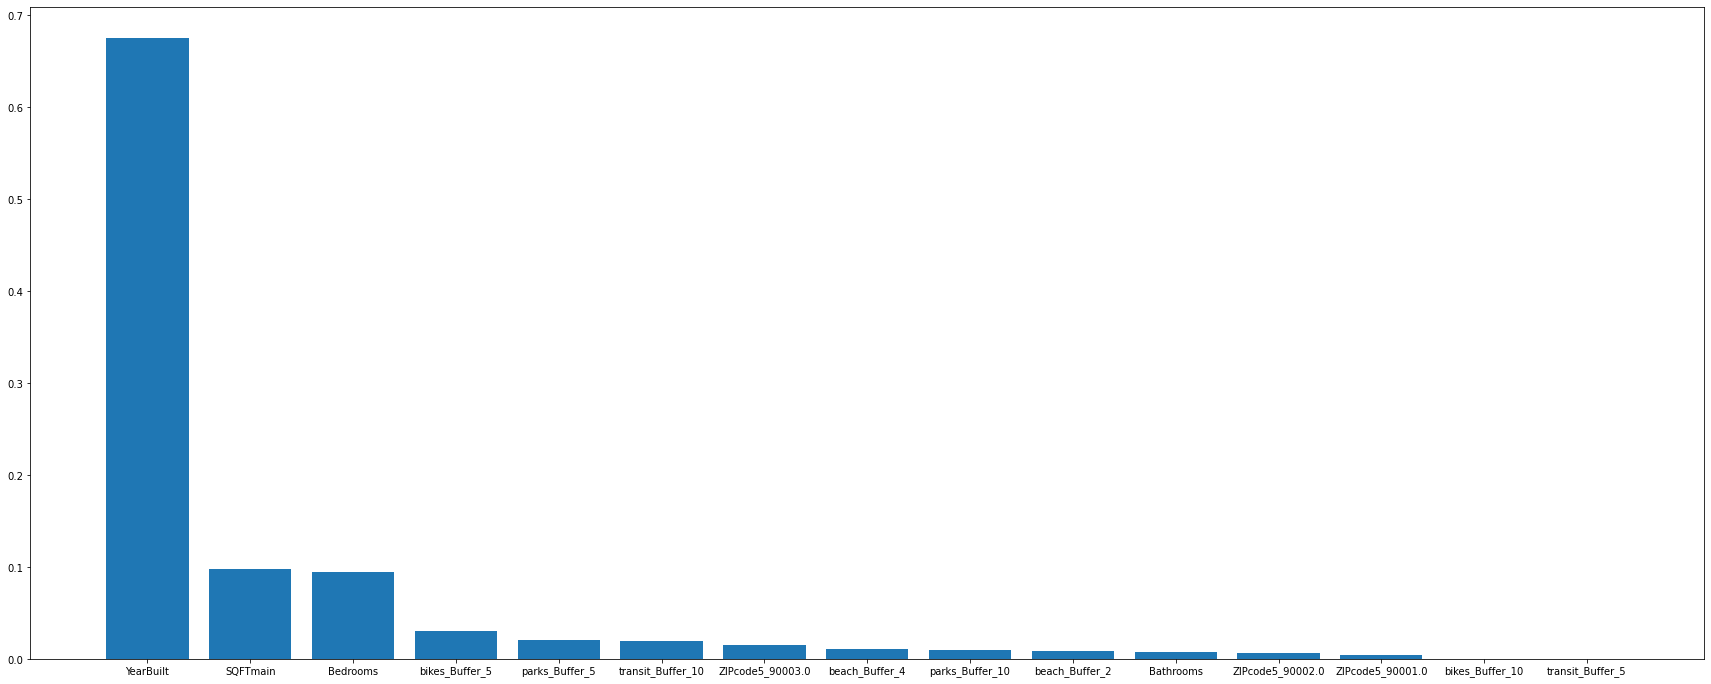

In [417]:
# plt.figure(figsize = (12,8))
# plt.title('Feature Importance')
# sns.barplot(data = {'importance': feat_f,
#                     'feature':cc}, y = 'feature', x = 'importance')
import matplotlib.pyplot as plt
feat = model.feature_importances_
feat_im = []
for i,v in enumerate(feat):
	feat_im.append((cc[i], v))

feat_im.sort(key = lambda y: y[1], reverse=True)
print(feat_im)

# plot feature importance
names = []
for i in range(0, 15):
	names.append(feat_im[i][0])

scores = []
for i in range(0, 15):
	scores.append(feat_im[i][1])

f, ax = plt.subplots(figsize=(30, 12))
plt.bar(names, scores, align='center')

In [27]:
# separate models for different areas
df_choosen['Age_5'] = df_choosen.apply(lambda row: year_5(row), axis = 1)
df_choosen['Age_10'] = df_choosen.apply(lambda row: year_10(row), axis = 1)
df_choosen['Age_20'] = df_choosen.apply(lambda row: year_20(row), axis = 1)
df_choosen['Age_older'] = df_choosen.apply(lambda row: year_older(row), axis = 1)

df_choosen["TotVal_SQFT"] = df_choosen.apply(lambda row: target(row), axis = 1)

df_choosen = df_choosen.drop(["TotalValue"], axis = 1)
print(df_choosen["TotVal_SQFT"].value_counts())

df_choosen = df_choosen[df_choosen['TotVal_SQFT'] != 0.000000]
df_choosen.replace([np.inf, -np.inf], np.nan, inplace = True)
df_choosen = df_choosen[df_choosen['TotVal_SQFT'].notna()]

/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/4210213335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choosen['Age_5'] = df_choosen.apply(lambda row: year_5(row), axis = 1)
/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/4210213335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choosen['Age_10'] = df_choosen.apply(lambda row: year_10(row), axis = 1)
/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/4210213335.py:4: SettingWithCopyWarning: 

0.000000      1294
inf            162
197.272727      71
403.720711      51
325.443284      50
              ... 
368.541995       1
127.500961       1
355.605516       1
313.422414       1
252.497287       1
Name: TotVal_SQFT, Length: 673835, dtype: int64


/var/folders/dc/f2fdpj8j53gfczh1jzq4s_3c0000gn/T/ipykernel_18648/4210213335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choosen["TotVal_SQFT"] = df_choosen.apply(lambda row: target(row), axis = 1)


In [28]:
zipcodes = list(df_choosen["ZIPcode5"].unique())

zips2 = [90023.0, 90210.0]

models = {}
for i in zips2:
    sub_df = df_choosen[df_choosen["ZIPcode5"] == i]
    
    X = sub_df.drop(["TotVal_SQFT", "AIN", "ZIPcode5", "YearBuilt"], axis = 1).to_numpy()
    y = sub_df["TotVal_SQFT"].to_numpy()

    model1 = RandomForestRegressor(random_state = 100)
    model1.fit(X, y)
    models[i] = model1


In [29]:
sub_df2 = df_choosen.loc[df_choosen["ZIPcode5"].isin([90004.0, 90005.0, 90010.0, 90020.0])]

    
X2 = sub_df2.drop(["TotVal_SQFT", "AIN", "ZIPcode5", "YearBuilt"], axis = 1).to_numpy()
y2 = sub_df2["TotVal_SQFT"].to_numpy()

model2 = RandomForestRegressor(random_state=100)
model2.fit(X2, y2)
models["koreatown"] = model2


In [30]:
# prediction
c = list(df_choosen.columns)
c.remove("TotVal_SQFT")
c.remove("AIN")
c.remove("ZIPcode5")
c.remove("YearBuilt")

# 2 bedrooms, 2 bathrooms, 900 sqft, 21+, 0 for all buffers (1 for 10min transit)
model_90210 = models[90210.0]

ix_bed = c.index("Bedrooms")
ix_bath = c.index("Bathrooms")
ix_sqft = c.index("SQFTmain")

ix_transit10 = c.index("transit_Buffer_10")
ix_bikes10 = c.index("bikes_Buffer_10")
ix_parks10 = c.index("parks_Buffer_10")
ix_older = c.index("Age_older")

input = [0] * len(c)

input[ix_bed] = 2
input[ix_bath] = 2
input[ix_sqft] = 900
input[ix_transit10] = 1
input[ix_bikes10] = 0
input[ix_parks10] = 0
input[ix_older] = 1

pred = model_90210.predict([input])

model_90023 = models[90023.0]
pred3 = model_90023.predict([input])

model_koreatown = models['koreatown']
pred4 = model_koreatown.predict([input])

print(pred, pred3, pred4)

[657.29332041] [147.07927762] [443.4903341]


In [ ]:
# from sklearn import tree
# _ = tree.plot_tree(model_koreatown.estimators_[0], feature_names=c, filled=True)